In [52]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
healthcare = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/healthcare.csv'
healthcare = pd.read_csv(healthcare)
healthcare.head(3)

,Unnamed: 0,가입자 일련번호,시도코드,연령대코드,서식코드,주상병코드,부상병코드,심결가산율
0,0,1,46,12,3,M751,M750,0.25
1,1,1,46,12,3,E1164,N308,0.25
2,2,1,46,12,3,N308,E1164,0.25


In [56]:
healthcare.replace([0.30, 0.25, 0.20, 0.15],['상급종합병원', '종합병원', '병원', '의원'],inplace=True)

In [57]:
healthcare['심결가산율'].values

array(['종합병원', '종합병원', '종합병원', ..., '종합병원', '종합병원', '의원'], dtype=object)

In [90]:
healthcare.rename(columns={'심결가산율':'요양기관'},inplace=True)
healthcare.head(3)

,Unnamed: 0,가입자 일련번호,시도코드,연령대코드,서식코드,주상병코드,부상병코드,요양기관
0,0,1,46,12,3,M751,M750,종합병원
1,1,1,46,12,3,E1164,N308,종합병원
2,2,1,46,12,3,N308,E1164,종합병원


In [95]:
seoul = healthcare[healthcare.시도코드==11]
seoul = seoul[['요양기관', '주상병코드']]
seoul.head()

,요양기관,주상병코드
59,의원,B308
60,의원,J209
61,의원,K219
62,의원,K641
63,의원,K641


In [99]:
s = seoul['요양기관'].value_counts()
s

의원        1846200
상급종합병원     181296
종합병원       179823
병원         154289
Name: 요양기관, dtype: int64

In [61]:
!sudo apt install -y fonts-nanum*  > /dev/null
!sudo fc-cache -fv                 > /dev/null
!rm ~/.cache/matplotlib -rf        > /dev/null

# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

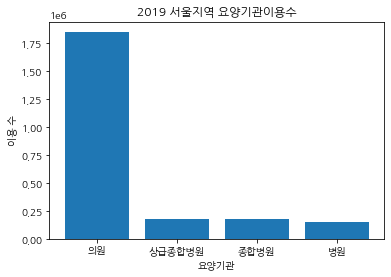

In [101]:
y = s.values
x = np.arange(len(y))
xlabel = s.index.to_list()

plt.title('2019 서울지역 요양기관이용수')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('요양기관')
plt.ylabel('이용 수')
plt.show()

In [106]:
healthcare = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/healthcare.csv'
healthcare = pd.read_csv(healthcare)
healthcare.head(3)

,Unnamed: 0,가입자 일련번호,시도코드,연령대코드,서식코드,주상병코드,부상병코드,심결가산율
0,0,1,46,12,3,M751,M750,0.25
1,1,1,46,12,3,E1164,N308,0.25
2,2,1,46,12,3,N308,E1164,0.25


In [107]:
# 결측치 확인
healthcare.isnull().sum()

Unnamed: 0    0
가입자 일련번호      0
시도코드          0
연령대코드         0
서식코드          0
주상병코드         0
부상병코드         0
심결가산율         0
dtype: int64

In [108]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


healthcare_encode = healthcare[['주상병코드', '부상병코드', '심결가산율']]

healthcare_encode = healthcare_encode.apply(label_encoder.fit_transform)

healthcare['주상병코드'] = healthcare_encode['주상병코드']
healthcare['부상병코드'] = healthcare_encode['부상병코드']
healthcare['심결가산율'] = healthcare_encode['심결가산율']


In [109]:
healthcare.head()

,Unnamed: 0,가입자 일련번호,시도코드,연령대코드,서식코드,주상병코드,부상병코드,심결가산율
0,0,1,46,12,3,5894,5882,2
1,1,1,46,12,3,1105,6704,2
2,2,1,46,12,3,6676,1069,2
3,3,1,46,12,2,1105,6704,2
4,4,1,46,12,3,2302,2925,0


In [110]:
from sklearn.preprocessing import MinMaxScaler

X = healthcare.iloc[:, 1:]
y = healthcare.loc[:, '시도코드']



scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [111]:
# 테스트 사이즈만 지정해주면 트레인/테스트 데이터를 나눠줌
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# 트레인에 사용되지 않은 데이터로 성능을 확인해야 함

In [ ]:
# 모델 빌딩, 트레이닝
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

In [31]:
healthcare = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/인구데이터/고령인구수2019.csv'
healthcare = pd.read_csv(healthcare)
healthcare.head(5)

,Unnamed: 0,행정구역별(읍면동),연령별,2019,2019.1,2019.2,2019.3
0,15,서울특별시,65~69세,481211,226481,254730,88.9
1,16,서울특별시,70~74세,377160,173395,203765,85.1
2,17,서울특별시,75~79세,285466,128585,156881,82.0
3,18,서울특별시,80~84세,169625,68264,101361,67.3
4,19,서울특별시,85세이상,106485,32115,74370,43.2
